## Correlation analysis between sentiment and stock prices

In [1]:
import pandas as pd

In [14]:
# read in the data_sentiment.csv
data_sentiment = pd.read_csv('../data_sentiment.csv')
data_sentiment.tail()

,Unnamed: 0.1,Unnamed: 0,headline,url,publisher,date,stock,year,month,day,cleaned_headline,sentiment
1407323,1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,2011.0,8.0,29.0,top narrow base index august 29,negative
1407324,1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,2011.0,6.0,22.0,recap wednesday top percentag gainer loser,positive
1407325,1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,2011.0,6.0,21.0,updat oppenheim color china zenix auto initi,neutral
1407326,1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,2011.0,6.0,21.0,oppenheim initi china zenix outperform 8 pt,neutral
1407327,1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12,ZX,2011.0,5.0,12.0,china zenix auto intern open trade 600 ipo pri...,neutral


In [4]:
# read in the data for each stock
aapl = pd.read_csv('../Data_with_TI/aapl_with_TI.csv')
amzn = pd.read_csv('../Data_with_TI/amzn_with_TI.csv')
google = pd.read_csv('../Data_with_TI/google_with_TI.csv')
msft = pd.read_csv('../Data_with_TI/msft_with_TI.csv')
tsla = pd.read_csv('../Data_with_TI/tsla_with_TI.csv')
nvda = pd.read_csv('../Data_with_TI/nvda_with_TI.csv')
meta = pd.read_csv('../Data_with_TI/meta_with_TI.csv')


In [5]:
# add stock ticker as a column
aapl['stock'] = 'AAPL'
amzn['stock'] = 'AMZN'
google['stock'] = 'GOOGL'
msft['stock'] = 'MSFT'
tsla['stock'] = 'TSLA'
nvda['stock'] = 'NVDA'
meta['stock'] = 'META'


In [7]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal,stock
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,AMZN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,AMZN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,AMZN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,AMZN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,AMZN


In [9]:
# combine all the dataframes into one
stock_data = pd.concat([aapl, amzn, google, msft, tsla, nvda, meta])

In [11]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal,stock
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,36.964279,493.134155,-6.550694,-1.274374,META
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,34.814669,489.350903,-8.810746,-2.781648,META
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,40.628601,487.098437,-9.500635,-4.125446,META
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,40.633231,485.061442,-9.932081,-5.286773,META
2925,2024-07-30,467.000000,472.730011,456.700012,463.190002,463.190002,11390400,0.0,0.0,492.545000,39.789373,482.978448,-10.357947,-6.301008,META


In [12]:
# drop all missing or NaN values
stock_data = stock_data.dropna()

In [13]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal,stock
33,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.097223,46188800,0.0,0.0,0.140681,39.642837,0.139135,-0.000377,0.001789,AAPL
34,1981-02-02,0.119420,0.119420,0.118862,0.118862,0.091630,23766400,0.0,0.0,0.139090,34.943807,0.137205,-0.001930,0.001045,AAPL
35,1981-02-03,0.123326,0.123884,0.123326,0.123326,0.095072,19152000,0.0,0.0,0.138058,39.682098,0.135883,-0.002769,0.000282,AAPL
36,1981-02-04,0.127790,0.128348,0.127790,0.127790,0.098513,27865600,0.0,0.0,0.137556,44.069116,0.135112,-0.003038,-0.000382,AAPL
37,1981-02-05,0.127790,0.128906,0.127790,0.127790,0.098513,7929600,0.0,0.0,0.137193,44.069116,0.134415,-0.003215,-0.000949,AAPL


In [18]:
# change the data_sentiment date column name to Date
data_sentiment = data_sentiment.rename(columns={'date': 'Date'})

In [56]:
# merge the stock data with the sentiment data on date and stock
merged_data = pd.merge(stock_data, data_sentiment, on=['Date', 'stock'], how='inner')

In [58]:
# change date to datetime and set it as index
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7002 entries, 2020-03-09 to 2020-05-28
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              7002 non-null   float64
 1   High              7002 non-null   float64
 2   Low               7002 non-null   float64
 3   Close             7002 non-null   float64
 4   Adj Close         7002 non-null   float64
 5   Volume            7002 non-null   int64  
 6   Dividends         7002 non-null   float64
 7   Stock Splits      7002 non-null   float64
 8   SMA               7002 non-null   float64
 9   RSI               7002 non-null   float64
 10  EMA               7002 non-null   float64
 11  MACD              7002 non-null   float64
 12  MACD_Signal       7002 non-null   float64
 13  stock             7002 non-null   object 
 14  Unnamed: 0.1      7002 non-null   int64  
 15  Unnamed: 0        7002 non-null   int64  
 16  headline          7002 n

In [60]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,...,Unnamed: 0.1,Unnamed: 0,headline,url,publisher,year,month,day,cleaned_headline,sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0,75.736624,35.286777,...,7118,7587,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020.0,3.0,9.0,crude awaken energi sector take 20 spill crude...,negative
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0,75.736624,35.286777,...,7119,7588,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020.0,3.0,9.0,investor movement index summari februari 2020,neutral
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,0.0,0.0,75.736624,35.286777,...,7120,7589,101 Stocks Moving In Monday's Mid-Day Session,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,2020.0,3.0,9.0,101 stock move monday midday session,neutral
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0,75.283999,44.605440,...,7110,7579,Peloton Shares Tick To Session Low As Hearing ...,https://www.benzinga.com/news/20/03/15519796/p...,Benzinga Newsdesk,2020.0,3.0,10.0,peloton share tick session low hear report app...,positive
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0,75.283999,44.605440,...,7111,7580,Morning Market Stats In 5 Minutes,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,2020.0,3.0,10.0,morn market stat 5 minut,neutral


In [61]:
# remove some columns that are not needed
merged_data = merged_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'headline', 'Dividends', 'Stock Splits'])

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7002 non-null   object 
 1   Open              7002 non-null   float64
 2   High              7002 non-null   float64
 3   Low               7002 non-null   float64
 4   Close             7002 non-null   float64
 5   Adj Close         7002 non-null   float64
 6   Volume            7002 non-null   int64  
 7   SMA               7002 non-null   float64
 8   RSI               7002 non-null   float64
 9   EMA               7002 non-null   float64
 10  MACD              7002 non-null   float64
 11  MACD_Signal       7002 non-null   float64
 12  stock             7002 non-null   object 
 13  url               7002 non-null   object 
 14  publisher         7002 non-null   object 
 15  year              7002 non-null   float64
 16  month             7002 non-null   float64


In [62]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal,stock,url,publisher,year,month,day,cleaned_headline,sentiment
Date,,,,,,,,,,,,,,,,,,,
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020.0,3.0,9.0,crude awaken energi sector take 20 spill crude...,negative
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020.0,3.0,9.0,investor movement index summari februari 2020,neutral
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,2020.0,3.0,9.0,101 stock move monday midday session,neutral
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15519796/p...,Benzinga Newsdesk,2020.0,3.0,10.0,peloton share tick session low hear report app...,positive
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,2020.0,3.0,10.0,morn market stat 5 minut,neutral


In [63]:
# remove some columns that are not needed
merged_data = merged_data.drop(columns=['year', 'month', 'day'])

In [64]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal,stock,url,publisher,cleaned_headline,sentiment
Date,,,,,,,,,,,,,,,,
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,crude awaken energi sector take 20 spill crude...,negative
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,investor movement index summari februari 2020,neutral
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,101 stock move monday midday session,neutral
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15519796/p...,Benzinga Newsdesk,peloton share tick session low hear report app...,positive
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,morn market stat 5 minut,neutral


In [29]:
merged_data.describe

<bound method NDFrame.describe of             Date       Open       High        Low      Close  Adj Close  \
0     2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
1     2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
2     2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
3     2020-03-10  69.285004  71.610001  67.342499  71.334999  69.398438   
4     2020-03-10  69.285004  71.610001  67.342499  71.334999  69.398438   
...          ...        ...        ...        ...        ...        ...   
6997  2020-05-26   9.156750   9.181750   8.672000   8.717750   8.687888   
6998  2020-05-26   9.156750   9.181750   8.672000   8.717750   8.687888   
6999  2020-05-27   8.625000   8.632750   7.996750   8.525250   8.496049   
7000  2020-05-27   8.625000   8.632750   7.996750   8.525250   8.496049   
7001  2020-05-28   8.412250   8.760500   8.379250   8.487000   8.457931   

          Volume        SMA        RSI        EMA      MACD  MACD

In [65]:
#convert sentiment to numerical values, i.e., positive = 1, negative = -1 and neutral = 0
merged_data['sentiment'] = merged_data['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

In [66]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal,stock,url,publisher,cleaned_headline,sentiment
Date,,,,,,,,,,,,,,,,
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,crude awaken energi sector take 20 spill crude...,-1
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,investor movement index summari februari 2020,0
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,101 stock move monday midday session,0
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15519796/p...,Benzinga Newsdesk,peloton share tick session low hear report app...,1
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,morn market stat 5 minut,0


In [67]:
# group by stock and calculate the daily percentage change with in each group
merged_data['daily_return'] = merged_data.groupby('stock')['Close'].pct_change() * 100

In [72]:
#drop nan values
merged_data = merged_data.dropna()

In [73]:
# correlation between sentiment score and stock returns
correlation = merged_data['sentiment'].corr(merged_data['daily_return'])

In [74]:
correlation

np.float64(0.06833277557005814)

In [75]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal,stock,url,publisher,cleaned_headline,sentiment,daily_return
Date,,,,,,,,,,,,,,,,,
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,investor movement index summari februari 2020,0,0.000000
2020-03-09,65.937500,69.522499,65.750000,66.542503,64.736046,286744800,75.736624,35.286777,74.322970,-1.977393,-1.225760,AAPL,https://www.benzinga.com/news/20/03/15508983/1...,Lisa Levin,101 stock move monday midday session,0,0.000000
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15519796/p...,Benzinga Newsdesk,peloton share tick session low hear report app...,1,7.202157
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15517906/m...,Benzinga Newsdesk,morn market stat 5 minut,0,0.000000
2020-03-10,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,75.283999,44.605440,74.038402,-1.955133,-1.371635,AAPL,https://www.benzinga.com/news/20/03/15517355/t...,IAM Newswire,main challeng face upcom ev era,1,0.000000


In [76]:
#save merged data to a csv file
merged_data.to_csv('../final_data3.csv', index=False)

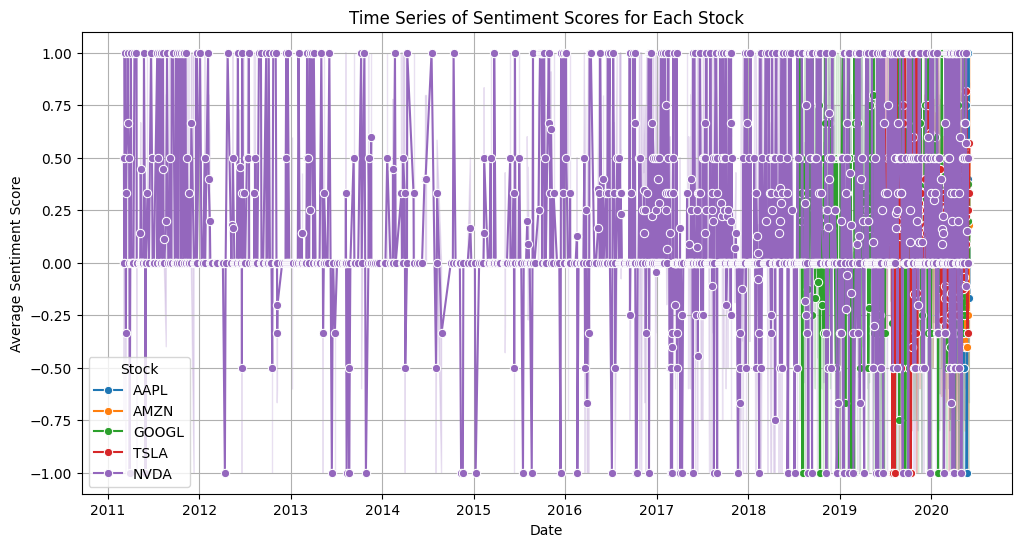

In [86]:
plt.figure(figsize=(12, 6))

# Use seaborn's lineplot to plot each stock's sentiment score over time
sns.lineplot(data=merged_data, x='Date', y='sentiment', hue='stock', marker='o')

# Customizing the plot
plt.title('Time Series of Sentiment Scores for Each Stock')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

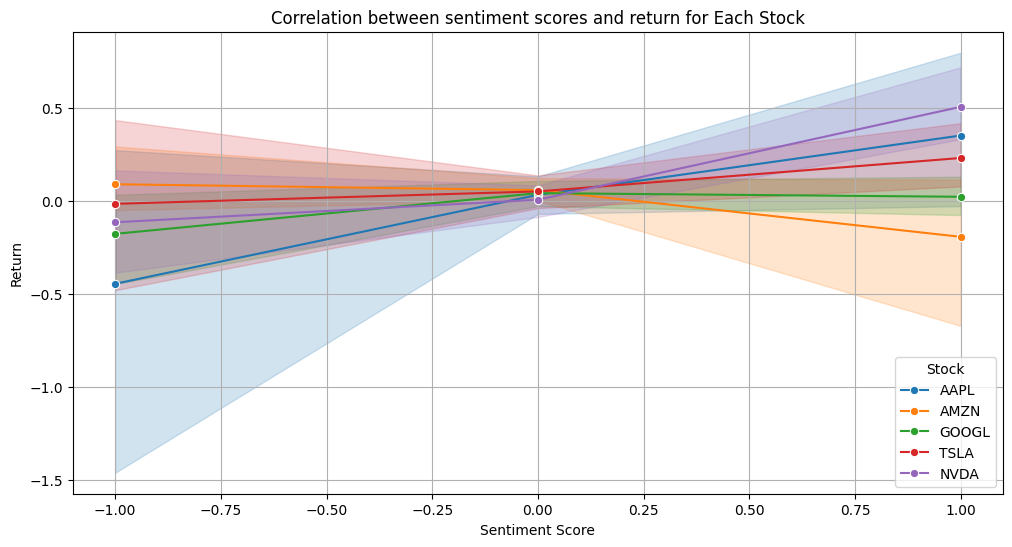

In [120]:
plt.figure(figsize=(12, 6))

# Use seaborn's lineplot to plot each stock's sentiment score over time
sns.lineplot(data=merged_data, x='sentiment', y='daily_return', hue='stock', marker='o')

# Customizing the plot
plt.title('Correlation between sentiment scores and return for Each Stock')
plt.xlabel('Sentiment Score')
plt.ylabel('Return')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

## Time series plots for individual stocks

### AAPL

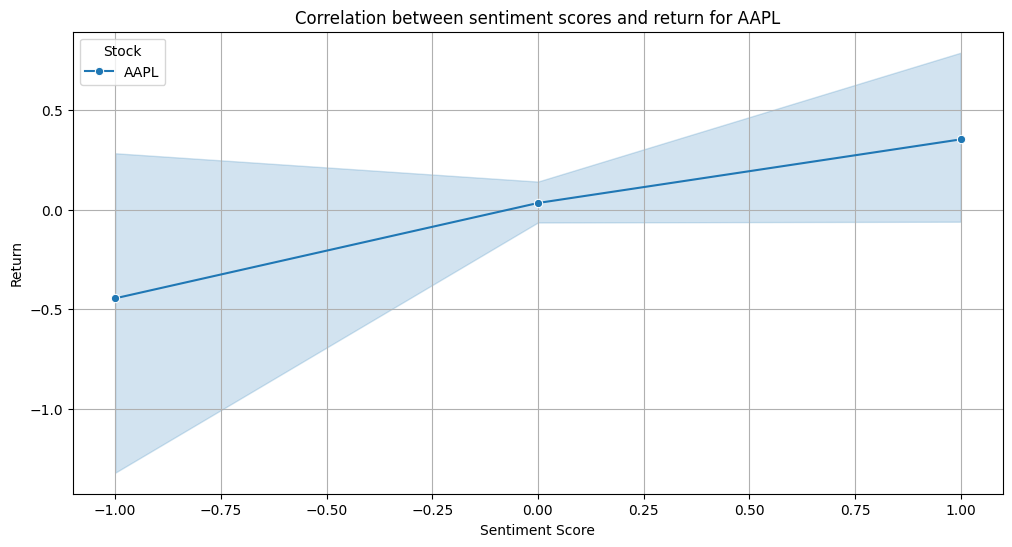

In [114]:
# Step 1: Filter the DataFrame for AAPL only
aapl_df = merged_data[merged_data['stock'] == 'AAPL']

plt.figure(figsize=(12, 6))
# Use seaborn's lineplot to plot the stock's sentiment score and return
sns.lineplot(data=aapl_df, x='sentiment', y='daily_return', hue='stock', marker='o')

# Customizing the plot
plt.title('Correlation between sentiment scores and return for AAPL')
plt.xlabel('Sentiment Score')
plt.ylabel('Return')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

### AMZN

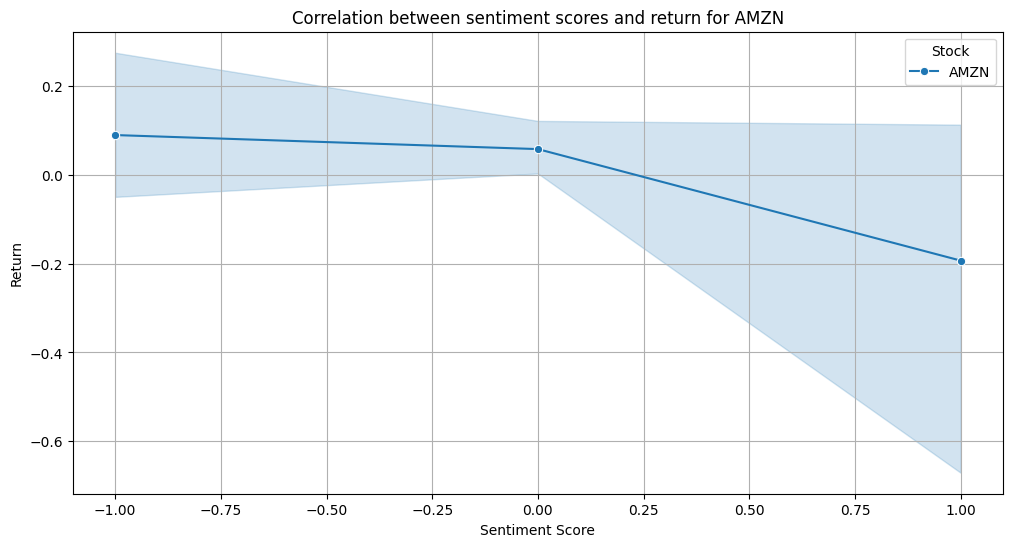

In [115]:
# Step 1: Filter the DataFrame for AMZN only
amzn_df = merged_data[merged_data['stock'] == 'AMZN']

plt.figure(figsize=(12, 6))
# Use seaborn's lineplot to plot the stock's sentiment score and return
sns.lineplot(data=amzn_df, x='sentiment', y='daily_return', hue='stock', marker='o')

# Customizing the plot
plt.title('Correlation between sentiment scores and return for AMZN')
plt.xlabel('Sentiment Score')
plt.ylabel('Return')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

### GOOGL

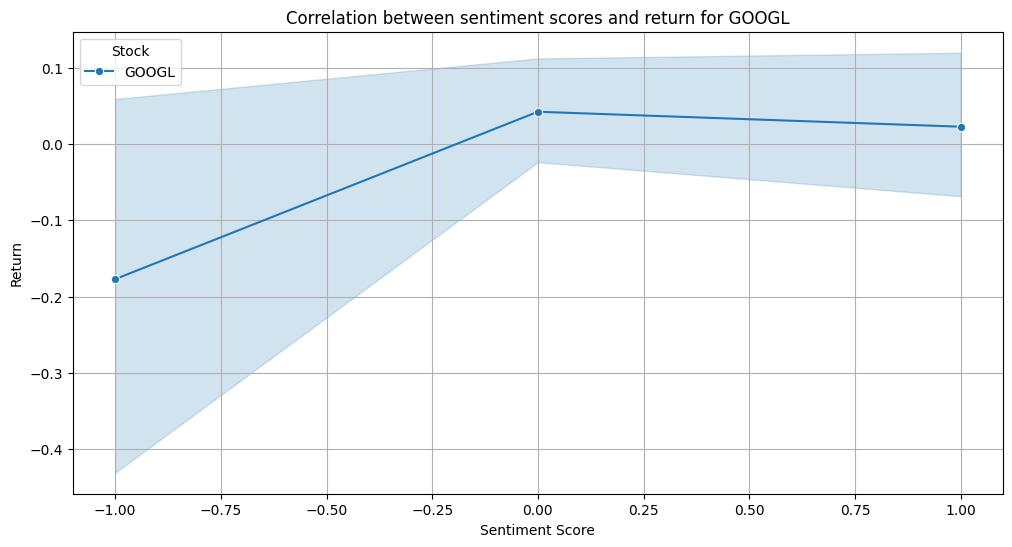

In [116]:
# Step 1: Filter the DataFrame for GOOGL only
googl_df = merged_data[merged_data['stock'] == 'GOOGL']

plt.figure(figsize=(12, 6))
# Use seaborn's lineplot to plot the stock's sentiment score vs return
sns.lineplot(data=googl_df, x='sentiment', y='daily_return',hue='stock', marker='o')

# Customizing the plot
plt.title('Correlation between sentiment scores and return for GOOGL')
plt.xlabel('Sentiment Score')
plt.ylabel('Return')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

### TSLA

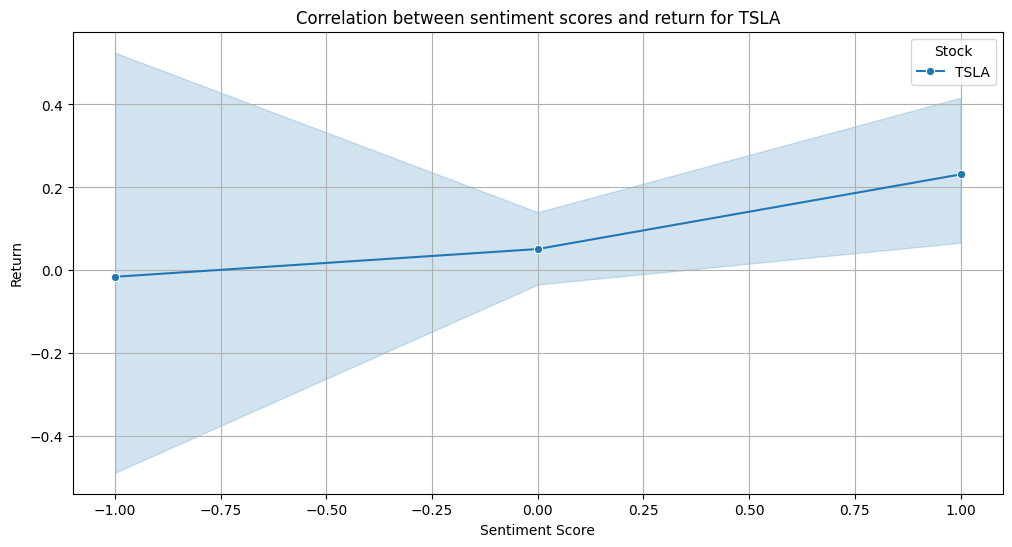

In [118]:
# Step 1: Filter the DataFrame for TSLA only
tsla_df = merged_data[merged_data['stock'] == 'TSLA']

plt.figure(figsize=(12, 6))
# Use seaborn's lineplot to plot the stock's sentiment score and return
sns.lineplot(data=tsla_df, x='sentiment', y='daily_return', hue='stock', marker='o')

# Customizing the plot
plt.title('Correlation between sentiment scores and return for TSLA')
plt.xlabel('Sentiment Score')
plt.ylabel('Return')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

### NVDA

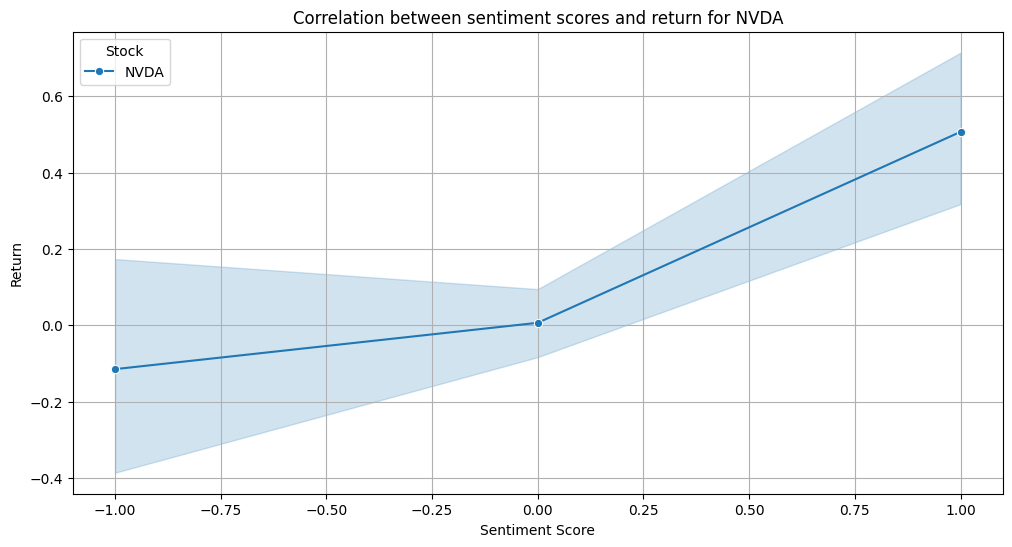

In [119]:
# Step 1: Filter the DataFrame for NVDA only
nvda_df = merged_data[merged_data['stock'] == 'NVDA']

plt.figure(figsize=(12, 6))
# Use seaborn's lineplot to plot the stock's sentiment score and returns
sns.lineplot(data=nvda_df, x='sentiment', y='daily_return', hue='stock', marker='o')

# Customizing the plot
plt.title('Correlation between sentiment scores and return for NVDA')
plt.xlabel('Sentiment Score')
plt.ylabel('Return')
plt.legend(title='Stock')
plt.grid(True)
plt.show()